# IMC Data Notebook

<Axes: xlabel='timestamp'>

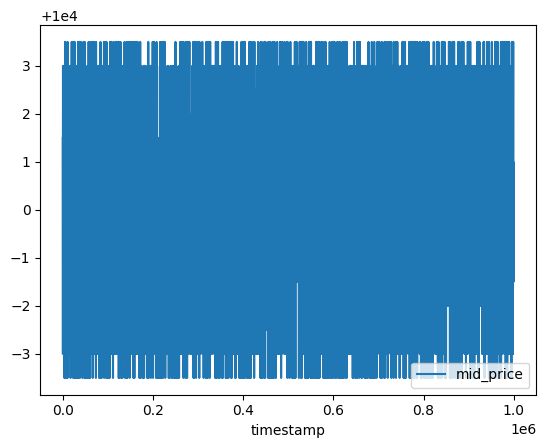

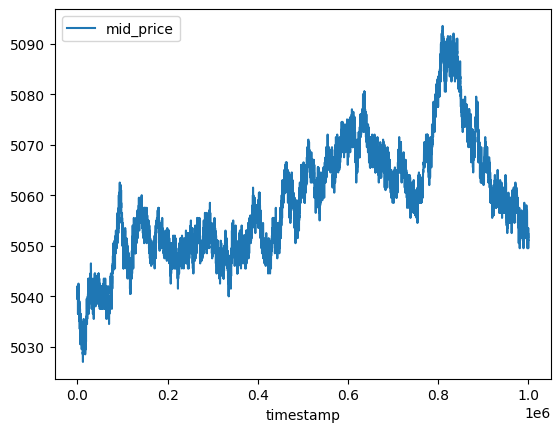

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

file_input = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_0.csv"
data = pd.read_csv(file_input, sep = ";")

amethysts_data = data[data["product"] == 'AMETHYSTS'].copy()
starfruit_df = data[data["product"] == 'STARFRUIT'].copy()

amethysts_data.plot(x='timestamp', y='mid_price')

starfruit_df.fillna(0, inplace=True)
starfruit_df.plot(x='timestamp', y='mid_price')

In [46]:
rolling_window = 10
starfruit_df['mid_price_ma5'] = starfruit_df['mid_price'].rolling(window=rolling_window).mean()
train_size = int(len(starfruit_df) * 0.8)
train_df = starfruit_df[:train_size]
test_df = starfruit_df[train_size:]

starfruit_df.fillna(0, inplace=True)
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_price_ma5
1,0,0,STARFRUIT,5036,30,0.0,0.0,0.0,0.0,5043,30,0.0,0.0,0.0,0.0,5039.5,0.0,0.00
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,0.0,0.0,0.0,0.0,5042.0,0.0,0.00
5,0,200,STARFRUIT,5037,1,5036.0,21.0,0.0,0.0,5043,1,5044.0,21.0,0.0,0.0,5040.0,0.0,0.00
6,0,300,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5044,25,0.0,0.0,0.0,0.0,5040.5,0.0,0.00
9,0,400,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5042,6,5044.0,25.0,0.0,0.0,5039.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,28,0.0,0.0,0.0,0.0,5052.5,0.0,5052.50
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,29,0.0,0.0,0.0,0.0,5051.0,0.0,5052.25
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,2,5055.0,24.0,0.0,0.0,5053.5,0.0,5052.35
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,1,5054.0,27.0,0.0,0.0,5049.5,0.0,5051.95


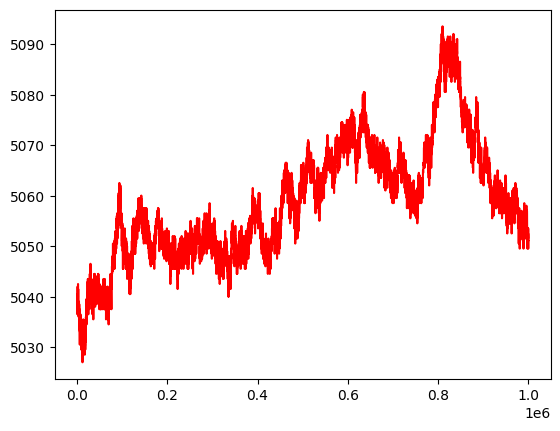

In [30]:
plt.plot(starfruit_df['timestamp'][rolling_window:], starfruit_df['mid_price'][rolling_window:], "red")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

# Train model for Starfruit
X_train_starfruit = train_df[['mid_price', 'mid_price_ma5']]
y_train_starfruit = train_df['mid_price']
model_starfruit = LinearRegression()
model_starfruit.fit(X_train_starfruit, y_train_starfruit)

LinearRegression()

In [37]:
X_test_starfruit = test_df[['mid_price', 'mid_price_ma5']]
y_test_starfruit = test_df['mid_price']
y_pred_starfruit = model_starfruit.predict(X_test_starfruit)
rmse_starfruit = np.sqrt(mean_squared_error(y_test_starfruit, y_pred_starfruit))
r2_starfruit = r2_score(y_test_starfruit, y_pred_starfruit)
print(f"Starfruit - RMSE: {rmse_starfruit:.2f}, R-squared: {r2_starfruit:.2f}")

comp_df = pd.DataFrame({'Actual': y_test_starfruit, 'Prediction': y_pred_starfruit})
comp_df['Delta'] = comp_df['Actual'] - comp_df['Prediction']
display(comp_df)

Starfruit - RMSE: 0.00, R-squared: 1.00


,Actual,Prediction,Delta
16001,5083.0,5083.0,-9.094947e-13
16003,5081.0,5081.0,-9.094947e-13
16005,5083.5,5083.5,-9.094947e-13
16006,5080.5,5080.5,-9.094947e-13
16009,5079.5,5079.5,-9.094947e-13
...,...,...,...
19990,5052.5,5052.5,0.000000e+00
19992,5051.0,5051.0,0.000000e+00
19995,5053.5,5053.5,0.000000e+00
19996,5049.5,5049.5,0.000000e+00


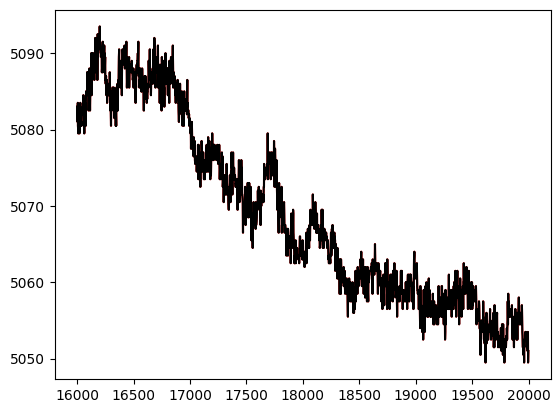

In [38]:
plt.figure()
plt.plot(y_test_starfruit.index, y_test_starfruit, color='red', label='Actual')
plt.plot(y_test_starfruit.index, y_pred_starfruit, color='black', label='Predicted')
plt.show()

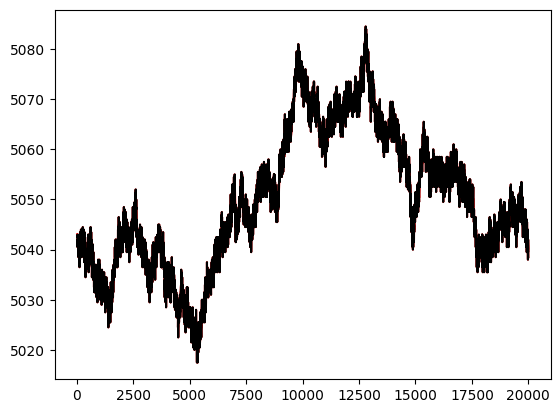

,Actual,Predictions,delta
21,5042.5,5042.5,0.0
23,5043.0,5043.0,0.0
25,5041.5,5041.5,0.0
26,5041.5,5041.5,0.0
29,5042.0,5042.0,0.0
...,...,...,...
19991,5041.5,5041.5,0.0
19992,5042.0,5042.0,0.0
19994,5040.5,5040.5,0.0
19996,5039.5,5039.5,0.0


In [41]:
file_input = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_-1.csv"
data = pd.read_csv(file_input, sep = ";")

starfruit_data = data[data["product"] == 'STARFRUIT'].copy()
starfruit_data.fillna(0, inplace=True)
rolling_window = 10
starfruit_data['mid_price_ma5'] = starfruit_data['mid_price'].rolling(window=rolling_window).mean()
X_test_starfruit = starfruit_data[['mid_price', 'mid_price_ma5']].fillna(0)
X_test_starfruit = X_test_starfruit[rolling_window:]

new_predictions = model_starfruit.predict(X_test_starfruit)
plt.figure()
plt.plot(X_test_starfruit.index, X_test_starfruit, color='red', label='Actual')
plt.plot(X_test_starfruit.index, new_predictions, color='black', label='Predicted')
plt.show()

comparison_df = pd.DataFrame({'Actual': X_test_starfruit['mid_price'], 
                              'Predictions': new_predictions})
comparison_df['delta'] = comparison_df['Predictions'] - comparison_df['Actual']
comparison_df

In [43]:
coefficients = model_starfruit.coef_
print("Coefficients:", coefficients)

intercept = model_starfruit.intercept_
print("Intercept:", intercept)

Coefficients: [1.00000000e+00 8.35469697e-17]
Intercept: -2.091837814077735e-11


In [45]:
manual_prediction = np.dot(X_test_starfruit, coefficients) + intercept
print(manual_prediction)

[5042.5 5043.  5041.5 ... 5040.5 5039.5 5038.5]
